In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vasan\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# importing the data
df=pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Removing the unwanted columns like state, self_employed, family_history, phys_health_consequence, phys_health_interview, Timestamp, comments

The reason behind deleting the above mentioned columns are explained below:
    <br>1. state - We are comparing the coutries only in the graph analysis
    <br>2. self_employed - We can avoid this because our focus is only about the corporate employees
    <br>3. family_history - We are concerning the current status only
    <br>4. phys_health_consequence - We are concern only about the mental stability
    <br>5. phys_health_interview - We are concern only about the mental stability
    <br>6. Timestamp - We are dealing with time frame so we can drop it
    <br>7. comments - It has most NaN and its not requried for the analysis

In [3]:
df.drop('state', axis=1, inplace=True)
df.drop('self_employed', axis=1, inplace=True)
df.drop('family_history', axis=1, inplace=True)
df.drop('phys_health_consequence', axis=1, inplace=True)
df.drop('phys_health_interview', axis=1, inplace=True)
df.drop('Timestamp', axis=1, inplace=True)
df.drop('comments', axis=1, inplace=True)

In [4]:
# finding the length of the dataframe
len(df)

1259

In [5]:
df

,Age,Gender,Country,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,mental_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Yes,Often,Jun-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,Some of them,Yes,No,Yes,No
1,44,M,United States,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,Don't know,No
2,32,Male,Canada,No,Rarely,Jun-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,No,Yes
4,31,Male,United States,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,Some of them,Some of them,No,Don't know,No
1255,32,Male,United States,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,Some of them,Yes,No,Yes,No
1256,34,male,United States,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,No
1257,46,f,United States,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No


#### We dont want the some more columns like no_employees,tech_company,benefits,care_options, wellness_program, seek_help,anonymity,supervisor,obs_consequence,work_interfere,leave

In [6]:
df.drop('no_employees', axis=1, inplace=True)
df.drop('tech_company', axis=1, inplace=True)
df.drop('benefits', axis=1, inplace=True)
df.drop('care_options', axis=1, inplace=True)
df.drop('wellness_program', axis=1, inplace=True)
df.drop('seek_help', axis=1, inplace=True)
df.drop('anonymity', axis=1, inplace=True)
df.drop('supervisor', axis=1, inplace=True)
df.drop('obs_consequence', axis=1, inplace=True)
df.drop('work_interfere', axis=1, inplace=True)
df.drop('leave', axis=1, inplace=True)

In [7]:
df.head()

,Age,Gender,Country,treatment,remote_work,mental_health_consequence,coworkers,mental_health_interview,mental_vs_physical
0,37,Female,United States,Yes,No,No,Some of them,No,Yes
1,44,M,United States,No,No,Maybe,No,No,Don't know
2,32,Male,Canada,No,No,No,Yes,Yes,No
3,31,Male,United Kingdom,Yes,No,Yes,Some of them,Maybe,No
4,31,Male,United States,No,Yes,No,Some of them,Yes,Don't know


In [8]:
#checking the NAN
len(df.dropna())

1259

So previous after droping the number of rows was 995 but now it has increased to 1259. that is there is no loss of data due to null values. Im viewing this as a great improvement in handling the missing data.

In [9]:
df=df.dropna()

In [10]:
# finding the uniqie values in gender
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [11]:
#changing the gender for the uniformity
df['Gender'].loc[df['Gender']=='M']='Male'
df['Gender'].loc[df['Gender']=='Male']='Male'
df['Gender'].loc[df['Gender']=='male']='Male'
df['Gender'].loc[df['Gender']=='female']='Female'
df['Gender'].loc[df['Gender']=='m']='Male'
df['Gender'].loc[df['Gender']=='Male-ish']='Male'
df['Gender'].loc[df['Gender']=='Trans-female']='Female'
df['Gender'].loc[df['Gender']=='Cis Female']='Female'
df['Gender'].loc[df['Gender']=='F']='Female'
df['Gender'].loc[df['Gender']=='Cis Male']='Male' 
df['Gender'].loc[df['Gender']=='f']='Female'
df['Gender'].loc[df['Gender']=='Mal']='Male'
df['Gender'].loc[df['Gender']=='queer/she/they']='Female'
df['Gender'].loc[df['Gender']=='non-binary']='Male'
df['Gender'].loc[df['Gender']=='woman']='Female'
df['Gender'].loc[df['Gender']=='Make']='Male'
df['Gender'].loc[df['Gender']=='Nah']='Male' 
df['Gender'].loc[df['Gender']=='All']='Male'
df['Gender'].loc[df['Gender']=='Enby']='Female'
df['Gender'].loc[df['Gender']=='fluid']='Female'
df['Gender'].loc[df['Gender']=='Genderqueer']='Female'
df['Gender'].loc[df['Gender']=='Female ']='Female'
df['Gender'].loc[df['Gender']=='Androgyne']='Female'
df['Gender'].loc[df['Gender']=='Agender']='Female'
df['Gender'].loc[df['Gender']=='cis-female/femme']='Female'
df['Gender'].loc[df['Gender']=='Guy (-ish) ^_^']='Male'
df['Gender'].loc[df['Gender']=='male leaning androgynous']='Male'
df['Gender'].loc[df['Gender']=='Trans woman']='Female'
df['Gender'].loc[df['Gender']== 'msle']='Male'
df['Gender'].loc[df['Gender']=='Neuter']='Female'
df['Gender'].loc[df['Gender']=='Female (trans)']='Female'
df['Gender'].loc[df['Gender']=='queer']='Female'
df['Gender'].loc[df['Gender']=='Female (cis)']='Female'
df['Gender'].loc[df['Gender']=='Mail']='Male'
df['Gender'].loc[df['Gender']=='cis male']='Male'
df['Gender'].loc[df['Gender']=='A little about you']='Female'
df['Gender'].loc[df['Gender']=='Malr']='Male'
df['Gender'].loc[df['Gender']=='p']='Female'
df['Gender'].loc[df['Gender']=='Woman']='Female'
df['Gender'].loc[df['Gender']=='femail']='Female'
df['Gender'].loc[df['Gender']=='Cis Man']='Male'
                 

C:\Users\vasan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
df['Gender'].unique()

array(['Female', 'Male', 'maile', 'something kinda male?', 'Male (CIS)',
       'Femake', 'Male ', 'Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
df['Gender'].loc[df['Gender']=='Male ']='Male'
df['Gender'].loc[df['Gender']=='ostensibly male, unsure what that really means']='Male'

In [14]:
df['Gender'].unique()

array(['Female', 'Male', 'maile', 'something kinda male?', 'Male (CIS)',
       'Femake', 'Man'], dtype=object)

In [15]:
df['Gender'].loc[df['Gender']=='maile']='Male'
df['Gender'].loc[df['Gender']=='something kinda male?']='Male'
df['Gender'].loc[df['Gender']=='Male (CIS)']='Male'
df['Gender'].loc[df['Gender']=='Man']='Male'
df['Gender'].loc[df['Gender']=='Femake']='Female'

In [16]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### 1. Comparing the mental illness of employees based on the gender category.

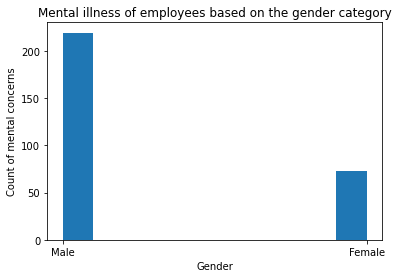

In [17]:
plt.hist(df.loc[df['mental_health_consequence']=='Yes','Gender'])
plt.xlabel('Gender')
plt.ylabel('Count of mental concerns')
plt.title('Mental illness of employees based on the gender category')
plt.show()

### 2.Comparing the mental illness of employees based on the countries.

In [18]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [19]:
# changing the country name to its correspnding code
df['Country'].loc[df['Country']=='United States']='USA'
df['Country'].loc[df['Country']=='Canada']='CAN'
df['Country'].loc[df['Country']=='United Kingdom']='UK'
df['Country'].loc[df['Country']=='Bulgaria']='BGR'
df['Country'].loc[df['Country']=='France']='FRA'
df['Country'].loc[df['Country']=='Portugal']='PRT'
df['Country'].loc[df['Country']=='Netherlands']='NLD'
df['Country'].loc[df['Country']=='Switzerland']='SWZ'
df['Country'].loc[df['Country']=='Poland']='POL'
df['Country'].loc[df['Country']=='Australia']='AUS'
df['Country'].loc[df['Country']=='Germany']='DEU'
df['Country'].loc[df['Country']=='Mexico']='MEX'
df['Country'].loc[df['Country']=='Brazil']='BRA'
df['Country'].loc[df['Country']=='Slovenia']='SVN'
df['Country'].loc[df['Country']=='Ireland']='IRE'
df['Country'].loc[df['Country']=='India']='IND'
df['Country'].loc[df['Country']=='South Africa']='ZAF'
df['Country'].loc[df['Country']=='Russia']='USSR'
df['Country'].loc[df['Country']=='Italy']='ITA'
df['Country'].loc[df['Country']=='Colombia']='COL'
df['Country'].loc[df['Country']=='Portugal']='POR'
df['Country'].loc[df['Country']=='Switzerland']='SWZ'
df['Country'].loc[df['Country']=='Belgium']='BEL'
df['Country'].loc[df['Country']=='Sweden']='SWE'
df['Country'].loc[df['Country']=='New Zealand']='NZL'
df['Country'].loc[df['Country']=='Zimbabwe']='ZMB'
df['Country'].loc[df['Country']=='Finland']='FIN'
df['Country'].loc[df['Country']=='Israel']='ISR'
df['Country'].loc[df['Country']=='Bosnia and Herzegovina']='BIH'
df['Country'].loc[df['Country']=='Austria']='AUT'
df['Country'].loc[df['Country']=='Hungary']='HUN'
df['Country'].loc[df['Country']=='Singapore']='SIN'
df['Country'].loc[df['Country']=='Japan']='JPN'
df['Country'].loc[df['Country']=='Croatia']='CRO'
df['Country'].loc[df['Country']=='Thailand']='THL'
df['Country'].loc[df['Country']=='Denmark']='DEN'
df['Country'].loc[df['Country']=='Bahamas, The']='BHS'
df['Country'].loc[df['Country']=='Moldova']='MOL'
df['Country'].loc[df['Country']=='Georgia']='GEO'
df['Country'].loc[df['Country']=='China']='CHN'
df['Country'].loc[df['Country']=='Czech Republic']='CZE'
df['Country'].loc[df['Country']=='Philippines']='PHL'
df['Country'].loc[df['Country']=='Costa Rica']='CSR'
df['Country'].loc[df['Country']=='Romania']='RMR'
df['Country'].loc[df['Country']=='Latvia']='LAT'
df['Country'].loc[df['Country']=='Spain']='SPN'
df['Country'].loc[df['Country']=='Greece']='GRE'
df['Country'].loc[df['Country']=='Nigeria']='NIA'

In [20]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

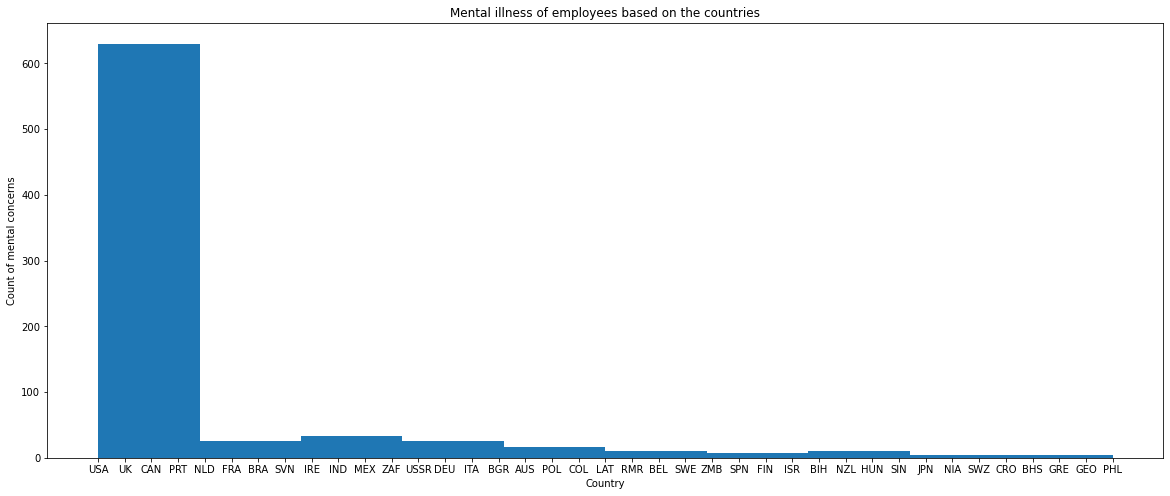

In [21]:
plt.rcParams["figure.figsize"] = (20,8)
plt.hist(df.loc[df['mental_health_consequence']!='No','Country'])
plt.xlabel('Country')
plt.ylabel('Count of mental concerns')
plt.title('Mental illness of employees based on the countries')
plt.show()

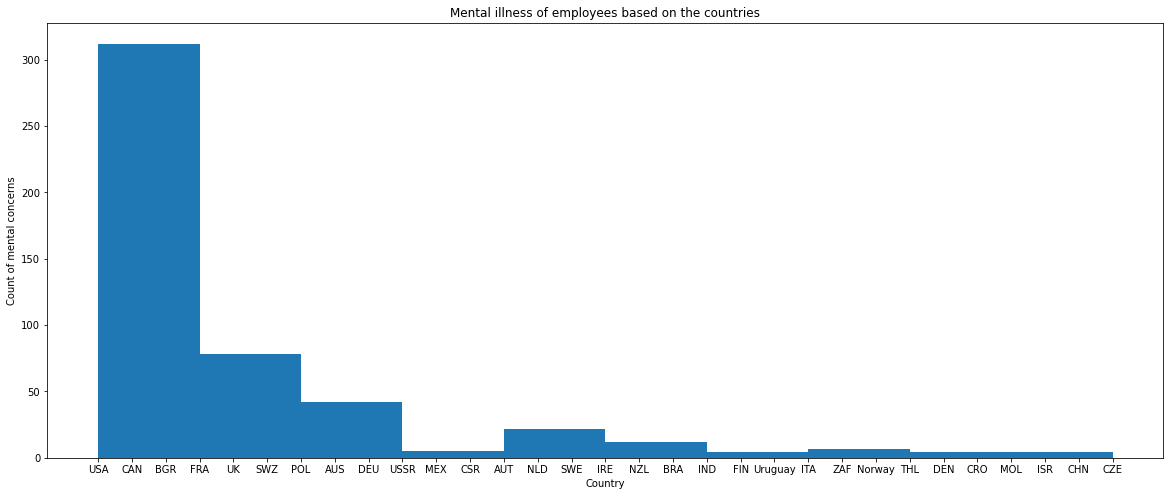

In [22]:
plt.rcParams["figure.figsize"] = (20,8)
plt.hist(df.loc[df['mental_health_consequence']=='No','Country'])
plt.xlabel('Country')
plt.ylabel('Count of mental concerns')
plt.title('Mental illness of employees based on the countries')
plt.show()

### 3.Comparing the mental illness of employees based on the remote work culture.

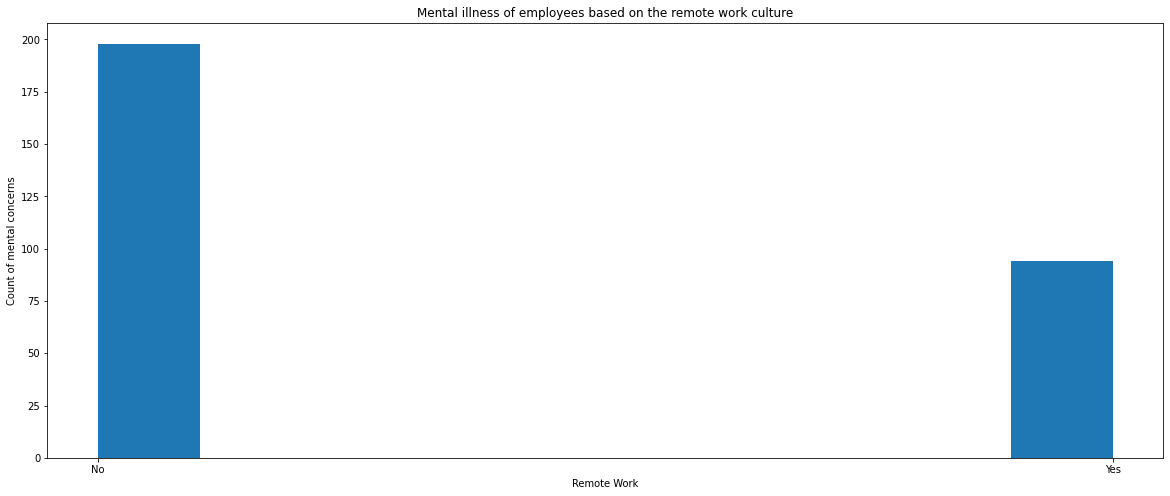

In [23]:
plt.hist(df.loc[df['mental_health_consequence']=='Yes','remote_work'])
plt.xlabel('Remote Work')
plt.ylabel('Count of mental concerns')
plt.title('Mental illness of employees based on the remote work culture')
plt.show()

### 4.Comparing the mental illness of employees based on the co-workers.

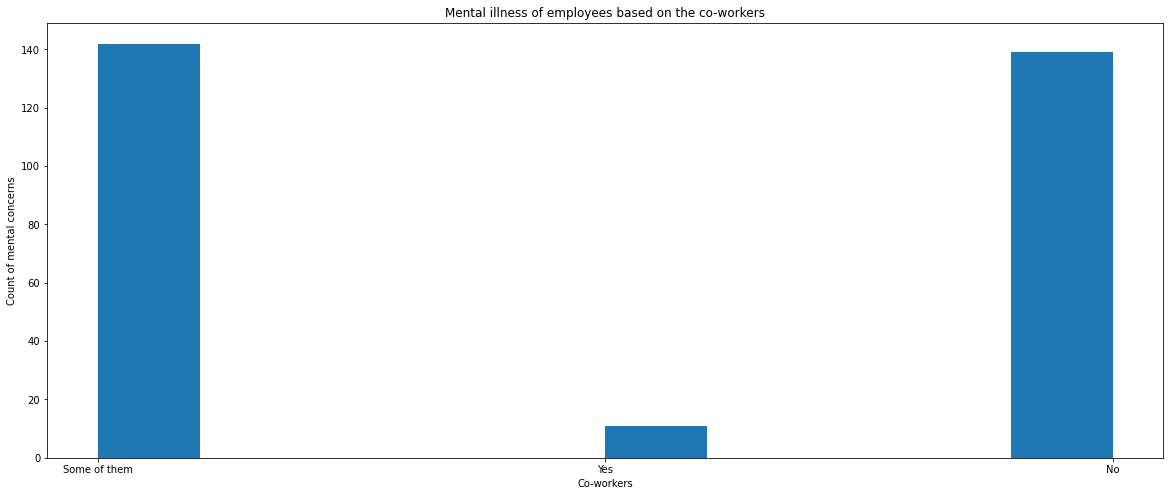

In [24]:
plt.hist(df.loc[df['mental_health_consequence']=='Yes','coworkers'])
plt.xlabel('Co-workers')
plt.ylabel('Count of mental concerns')
plt.title('Mental illness of employees based on the co-workers')
plt.show()

Based on the above graphical analysis we find the below observations:
<br>1. The mental illness for men is higher than the women
<br>2. "The mental illness rate in the United States is way higher than the Bahamas" this was my last week's conclusion. But, after a certain deeper analysis, I have included all the countries and also did a graph with countries having several people with illness and without. In both, USA is the first and it shows that the number of entries is different for different countries and last week's conclusion is wrong.
<br>3. Remote employees also have a mental illness at the same rate as non-remote workers. So remote jobs won't give that much relief for the mental illness
<br>4. If we have more co-workers then there is a high possibility of reducing mental illness.

### Building a model and evaluating

In [25]:
#importing libraries
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Sklearn regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Sklearn regression model evaluation function
from sklearn.metrics import mean_absolute_error

In [26]:
plt.style.use('bmh')

In [27]:
#print df
df.head()

,Age,Gender,Country,treatment,remote_work,mental_health_consequence,coworkers,mental_health_interview,mental_vs_physical
0,37,Female,USA,Yes,No,No,Some of them,No,Yes
1,44,Male,USA,No,No,Maybe,No,No,Don't know
2,32,Male,CAN,No,No,No,Yes,Yes,No
3,31,Male,UK,Yes,No,Yes,Some of them,Maybe,No
4,31,Male,USA,No,Yes,No,Some of them,Yes,Don't know


#### Changing all string data to number

In [28]:
df['Gender'].loc[df['Gender']=='Male']=1
df['Gender'].loc[df['Gender']=='Female']=2

C:\Users\vasan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [29]:
df['treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df['treatment'].loc[df['treatment']=='Yes']=1
df['treatment'].loc[df['treatment']=='No']=0

In [31]:
df['remote_work'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['remote_work'].loc[df['remote_work']=='Yes']=1
df['remote_work'].loc[df['remote_work']=='No']=0

In [33]:
df['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [34]:
df['mental_health_consequence'].loc[df['mental_health_consequence']=='Yes']=1
df['mental_health_consequence'].loc[df['mental_health_consequence']=='No']=0
df['mental_health_consequence'].loc[df['mental_health_consequence']=='Maybe']=0.5

In [35]:
df['coworkers'].unique()

array(['Some of them', 'No', 'Yes'], dtype=object)

In [36]:
df['coworkers'].loc[df['coworkers']=='Yes']=1
df['coworkers'].loc[df['coworkers']=='No']=0
df['coworkers'].loc[df['coworkers']=='Some of them']=0.5

In [37]:
df['mental_health_interview'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [38]:
df['mental_health_interview'].loc[df['mental_health_interview']=='Yes']=1
df['mental_health_interview'].loc[df['mental_health_interview']=='No']=0
df['mental_health_interview'].loc[df['mental_health_interview']=='Maybe']=0.5

In [39]:
df['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [40]:
df['mental_vs_physical'].loc[df['mental_vs_physical']=='Yes']=1
df['mental_vs_physical'].loc[df['mental_vs_physical']=='No']=0
df['mental_vs_physical'].loc[df['mental_vs_physical']=="Don't know"]=0.5

In [41]:
df['Gender'].unique()

array([2, 1], dtype=object)

In [42]:
df.head()

,Age,Gender,Country,treatment,remote_work,mental_health_consequence,coworkers,mental_health_interview,mental_vs_physical
0,37,2,USA,1,0,0,0.5,0,1
1,44,1,USA,0,0,0.5,0,0,0.5
2,32,1,CAN,0,0,0,1,1,0
3,31,1,UK,1,0,1,0.5,0.5,0
4,31,1,USA,0,1,0,0.5,1,0.5


In [43]:
y = df["mental_health_consequence"]
X = df[['Gender', 'treatment', 'remote_work', 'coworkers', 'mental_health_interview', 'mental_vs_physical']]

In [44]:
# Rescale the data
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# Convert X back to a Pandas DataFrame, for convenience
X = pd.DataFrame(rescaledX, index=X.index, columns=X.columns)

In [45]:
#Split into test and training set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [46]:
#Create Multiple Models, Fit and Check Them
models = [LinearRegression(), KNeighborsRegressor()]

In [47]:
for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_train)
    print(type(model).__name__, mean_absolute_error(Y_train, predictions))

LinearRegression 0.2517038612767808
KNeighborsRegressor 0.2501779359430605


In [48]:
#Evaluating models
for model in models:
    predictions = model.predict(X_test)
    print(type(model).__name__, mean_absolute_error(Y_test, predictions))

LinearRegression 0.25657101319571274
KNeighborsRegressor 0.28125


In [49]:
predictions = model.predict(X_test)
df = X_test.copy()
df['Prediction'] = predictions
df['Actual'] = Y_test
df["Error"] = Y_test - predictions
df

,Gender,treatment,remote_work,coworkers,mental_health_interview,mental_vs_physical,Prediction,Actual,Error
972,0.0,1.0,0.0,1.0,0.0,0.5,0.2,0,-0.2
719,0.0,0.0,0.0,1.0,0.0,0.5,0.4,0,-0.4
979,0.0,1.0,0.0,1.0,0.0,0.0,0.5,0.5,0
550,1.0,0.0,0.0,0.5,0.0,0.5,0.6,0.5,-0.1
512,0.0,0.0,0.0,0.0,0.0,0.5,0.6,0.5,-0.1
...,...,...,...,...,...,...,...,...,...
256,1.0,1.0,0.0,0.5,0.0,1.0,0.2,0.5,0.3
48,0.0,0.0,0.0,1.0,0.0,1.0,0.2,0,-0.2
623,1.0,1.0,0.0,0.0,0.0,0.5,0.8,1,0.2
480,0.0,0.0,0.0,1.0,0.5,1.0,0,0,0


### Summaries

As per the Linear regression and KNeighborsRegressoion we got the output as 0.26 and 0.28 respectively. Thus the chances of affecting mental illness value based on other values are around 26% to 28%